In [23]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import re
import requests
import json
import seaborn

# QUESTION 3 

## 3.1 TOP 15 RESTAURANTS HAVING MAXIMUM NUMBER OF OUTLETS 

In [ ]:
# This part is highly skewed towards India . Country Code for India is 1 . 
# maintained a dictionary for restaurants name as key and no of restaurants as value . 
# On plotting is has been observed that Cafe Coffee Day has the highest number of outlets . 


In [39]:
df = pd.read_csv('zomato.csv' , encoding = 'ISO-8859-1')
# print(df.head)
In = df[df['Country Code'] == 1]
res = np.array(In['Restaurant Name'])
# for i in res:
#     print(i)
# print(In.describe())

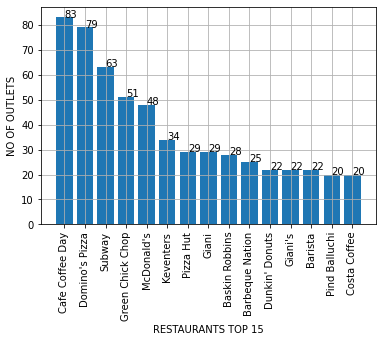

In [67]:
res_dict = {}
for i in res:
    if i not in res_dict:
        res_dict[i] = 1
    else:
        res_dict[i] += 1
s = dict(sorted(res_dict.items() , key = lambda item: item[1] , reverse = True)[0:15])
# print(s)
x = [i for i in s]
y = [s[i] for i in s]
# print(y)
plt.bar(x,y)
plt.xticks(rotation = "90")
plt.grid()
plt.xlabel("RESTAURANTS TOP 15")
plt.ylabel("NO OF OUTLETS")
for index , value in enumerate(y):
    plt.text(index  , value  , str(value))
plt.show()

# 3.2 HISTOGRAM

In [46]:
# For getting histogram (frequency graph) I have fetched only those ratings which are not empty .
# As mentioned in the question to not include the unrated restaurants . On plotting , it has been
# observed that ratings 3-4 have highest frequency , indicating that there are maximum number 
# of restaurants with average rating 3 to 4 . Rating 5 is of lowest frequency indicating restaurants
# quite less than hundred with rating between 4.5 and 5

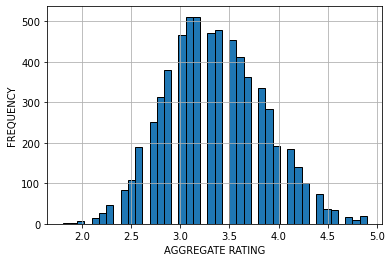

In [73]:
rating = In[In['Rating text'] != 'Not rated']

ratings = np.array(rating['Aggregate rating'])

plt.hist(ratings , bins = "auto" , edgecolor = 'black')
plt.grid()
plt.xlabel("AGGREGATE RATING")
plt.ylabel("FREQUENCY")
plt.show()

# 3.3 HIGHEST NUMBER OF VOTES 

In [ ]:
# I have maintained a simple dictionary , key as restaurant name and number value will be number of 
# votes , if the restaurant name is present in dictionary i will simply add the number of votes . 
# Else , I will create a new key with value as number of votes in dicitonary . On plotting 
# the graph , I have found that Barbeque Nation has most number of votes and Peter Cat with 
# tenth position . 

In [54]:
res = np.array(In['Restaurant Name'])
votes = np.array(In['Votes'])
# for i in restaurants:
#     print(i)

In [71]:
dict_ = {}
for i in range(len(res)):
    if res[i] not in dict_:
        if votes[i] != 0:
            dict_[res[i]] = votes[i]
    else:
        dict_[res[i]] += votes[i]
s = dict(sorted(dict_.items() , key = lambda item: item[1] , reverse = True)[0:10])
print(s)


{'Barbeque Nation': 27835, "AB's - Absolute Barbecues": 13400, 'Toit': 10934, 'Big Chill': 10853, 'Truffles': 9682, 'Farzi Cafe': 9189, "Chili's": 8156, 'Hauz Khas Social': 7931, "Joey's Pizza": 7807, 'Peter Cat': 7574}


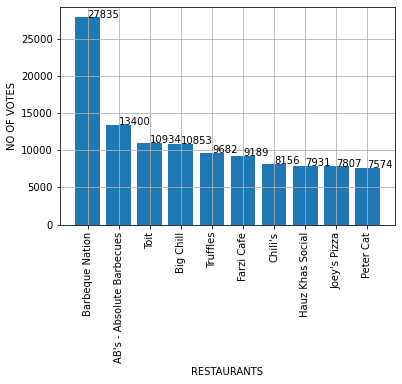

In [72]:
x = [i for i in s]
y = [s[i] for i in s]
plt.bar(x,y)
plt.xticks(rotation = "90")
plt.xlabel("RESTAURANTS")
plt.ylabel("NO OF VOTES")
plt.grid()
for index , value in enumerate(y):
    plt.text(index  , value  , str(value))
plt.show()

# print(In.describe())

# 3.4 PIE CHART 

In [57]:
# Country code for USA is 216 (found through zomato api). There were cuisines with nan values.
# Basically the cuisines were not mentioned . I have removed such rows .Maintained a simple 
# dictionary with key as cuisine name and if cuisine name present in dictionary , add one indicating
# the restaurant , else equate with one indicating a new entry , hence value of dictionary is total 
# restaurants serving the cuisine which in turn is the key.
# On plotting it has been discovered that the cuisine 'American' is the highest served cuisine (22.18%)
# and cuisine 'Sushi' the tenth with 6.73% .(percentage refers to the actual share in only top 10)

In [ ]:
usa = df[df['Country Code'] == 216]
print(usa)

In [31]:
usaa = usa.copy()
# print(usaa)

In [32]:
usaa.dropna(axis = 0,inplace = True)
# print(usaa)

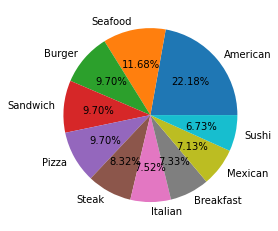

In [33]:
_dict = {}
cuisines = np.array(usaa['Cuisines'])
for i in cuisines:
#     print(i)
    x = i.strip().split(', ')
#     print(x)
    for j in x:
        if j not in _dict:
            _dict[j] = 1
        else:
            _dict[j] += 1
# for i in _dict:
#     print(i,_dict[i])
s = dict(sorted(_dict.items() , key = lambda item: item[1] , reverse = True)[0:10])
# for i in s:
#     print(i , _dict[i])
x = [i for i in s]
# print(x)
y = [s[i] for i in s]
# print(y)
plt.pie(y , labels = x , autopct = "%.2f%%")
plt.show()

# 3.5 BUBBLE GRAPH 

In [ ]:
# Done the same way in Q2.2.1 , calculated the weighted average , x axis has cities in India 
# y axis their number of restaurant , bubble size represents , the weighted average rating . 

# SL    City       Rating
# 1 	 New Delhi 	 3.77
# 2 	 Gurgaon 	 3.74
# 3 	 Noida 	     3.47
# 4 	 Faridabad 	 3.48
# 5 	 Ghaziabad 	 3.04
# 6 	 Lucknow 	 4.32
# 7 	 Guwahati 	 4.27
# 8 	 Ahmedabad 	 4.16
# 9 	 Bhubaneshwar3.97
# 10 	 Amritsar 	 3.76
# 11 	 Bangalore 	 4.5
# 12 	 Chennai 	 4.32
# 13 	 Kolkata 	 4.3
# 14 	 Pune 	     4.28
# 15 	 Jaipur 	 4.28
# 16 	 Mumbai 	 4.22
# 17 	 Coimbatore  4.17
# 18 	 Goa 	     4.16
# 19 	 Kochi 	     4.14
# 20 	 Vizag 	     4.13

In [63]:
dict_ = {}


cities = np.array(In['City'])
ratings = np.array(In['Aggregate rating'])
votes = np.array(In['Votes'])

for i in range(len(cities)):
    if votes[i]!=0:
        if cities[i] not in dict_:
            dict_[cities[i]] = [votes[i]*ratings[i],votes[i],1]
        else:
            dict_[cities[i]][0] += votes[i]*ratings[i]
            dict_[cities[i]][1] += votes[i]
            dict_[cities[i]][2] +=1


        



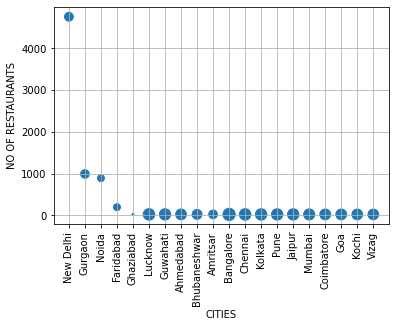

In [66]:
total_avg = []
for key,value in dict_.items():
    city = key
    wart = round(value[0]/value[1],2)
    total_avg.append([value[2],wart,key])
    
total_avg.sort(reverse=True)
cities = np.array([ i[2] for i in total_avg][0:20])
ratings = np.array([ i[1] for i in total_avg][0:20])
ratings = ratings-3
counts = np.array([ i[0] for i in total_avg][0:20])
ratings[ratings[0]<0] = -ratings[0]

plt.scatter(cities,counts,s=ratings*100)
plt.xticks(rotation=90)
plt.grid()
plt.xlabel("CITIES")
plt.ylabel("NO OF RESTAURANTS")
plt.show()